In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\sethp\python ds\ds_basic_project\Diwali Sales Data.csv",encoding='unicode_escape')

In [4]:
df.shape

(11251, 15)

In [5]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
# delete the unwanted null/blanck column
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [9]:
# got the sum of null data in the datafranme
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:
# inplace means implement at immedeate point
# without use inplace the impementation will not save for later
# instead of this we  can also assing this to as variable
df.dropna(inplace=True)

In [12]:
df.shape

(11239, 13)

In [13]:
# change data type to int
df['Amount']=df['Amount'].astype('int')

In [15]:
df['Amount'].dtype

dtype('int32')

In [16]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


DATA ANYLASIS

In [18]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

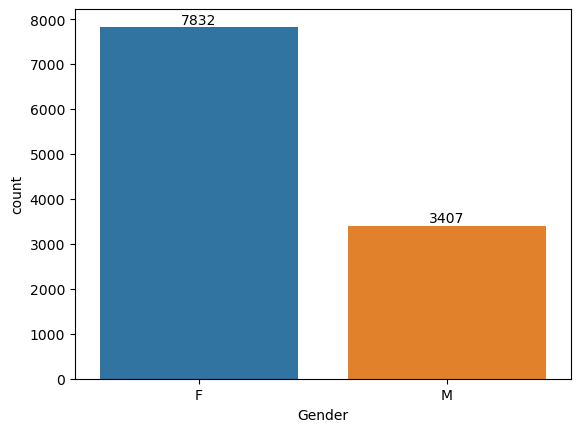

In [19]:
ax=sns.countplot(x='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [21]:
sales_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sales_gen

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

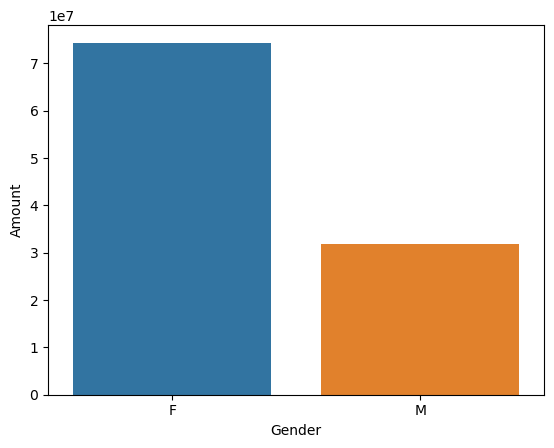

In [23]:
sns.barplot(x='Gender',y='Amount',data=sales_gen)

in the abobe graph we can see female are do more shopping as compare to male

In [30]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [32]:
# ax=sns.countplot(data=df,x="Age Group",hue='Gender')

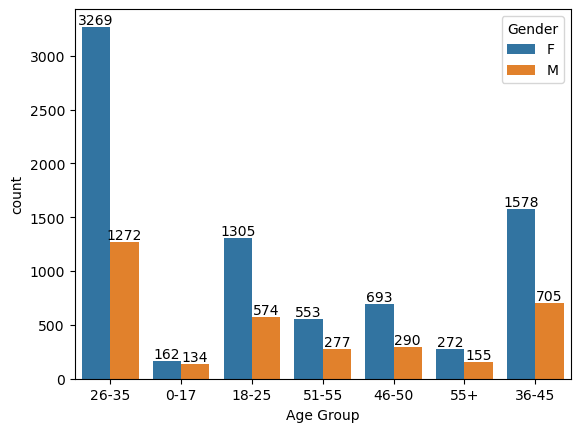

In [26]:
ax=sns.countplot(data=df,x="Age Group",hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

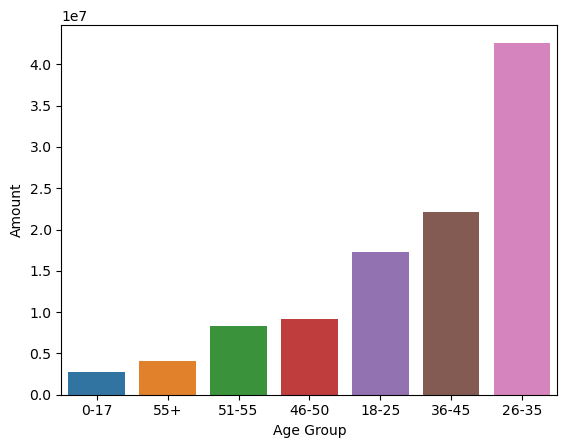

In [44]:
# total amount vs age group
sale_age=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=True)
sns.barplot(x='Age Group',y='Amount',data=sale_age)

from above bar graph we can see the 26-35 age group are most buyer in the whole list.

# state 

In [45]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

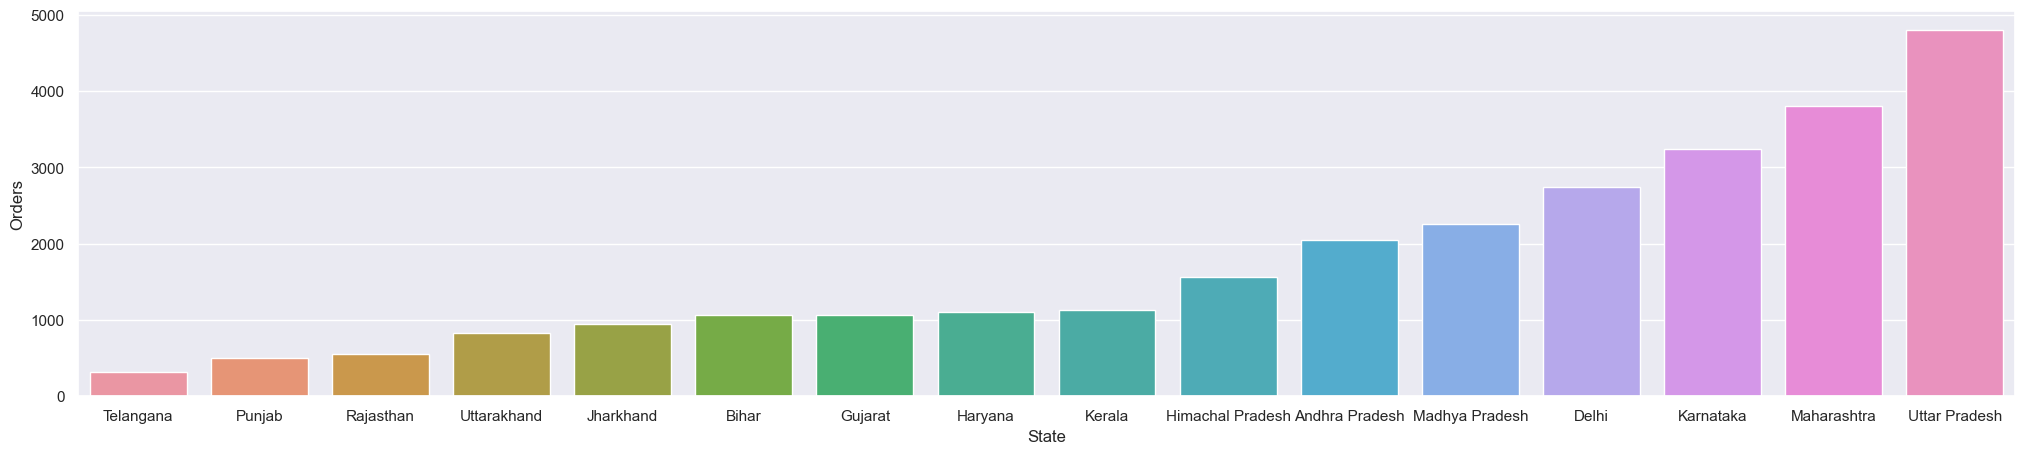

In [64]:
sales_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=True)
#size of the chart
sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(x='State',y='Orders',data=sales_state)

<Axes: xlabel='State', ylabel='Amount'>

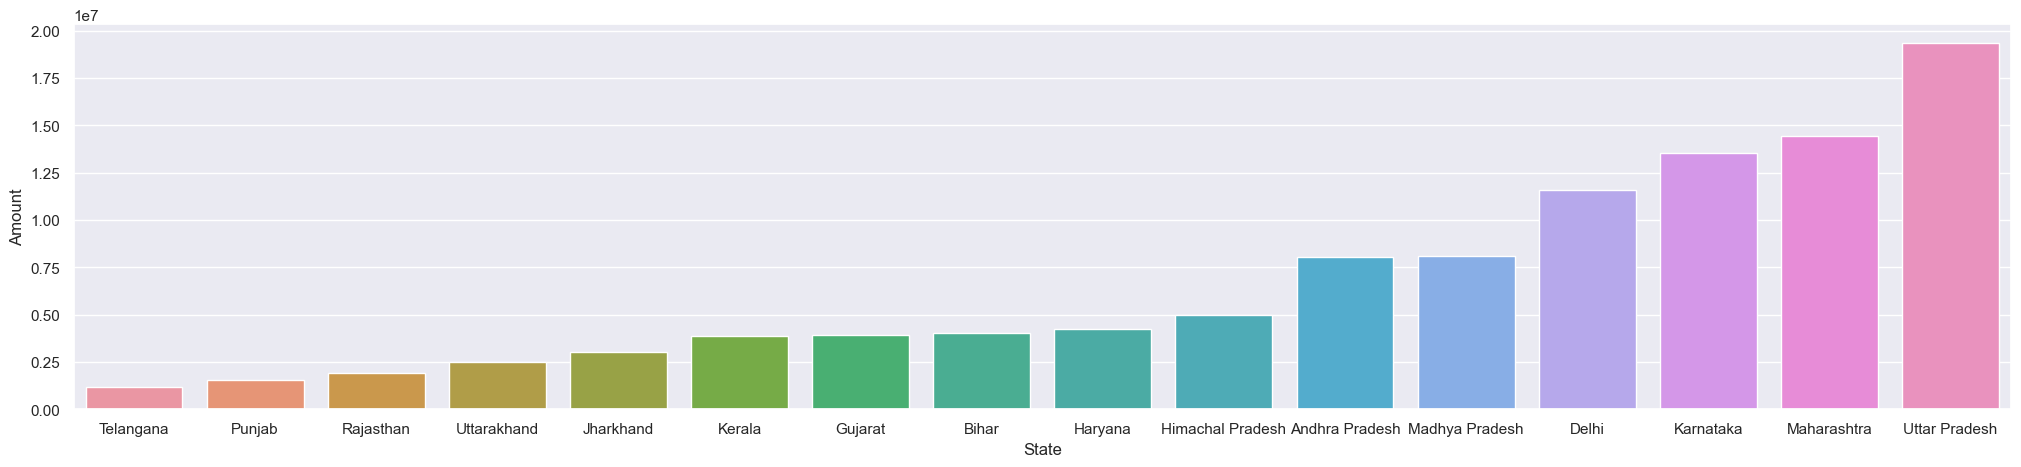

In [65]:
# total amount of sale from the state
amount_state=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=True)
sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(x='State',y="Amount",data=amount_state)

the utter pradesh is a state their most product are orderd and most valuation order is orderd from Utter Pradesh

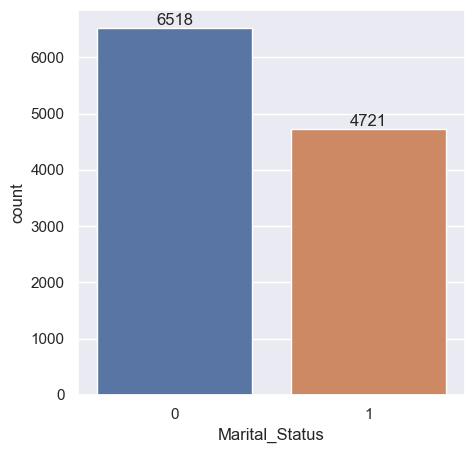

In [69]:
ps=sns.countplot(data=df,x="Marital_Status")
sns.set(rc={'figure.figsize':(15,5)})
for bars in ps.containers:
    ps.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

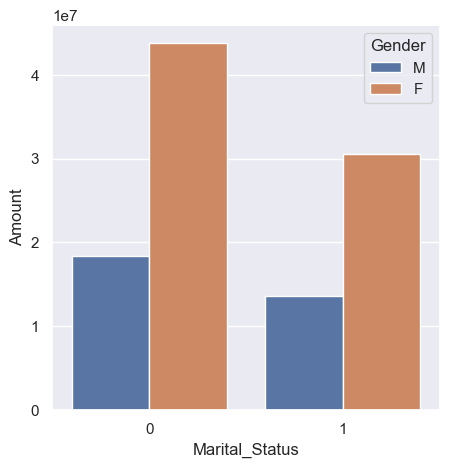

In [74]:
sale_marital=df.groupby(['Marital_Status',"Gender"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=True)
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(data=sale_marital,x='Marital_Status',y='Amount',hue="Gender")

most shopping is done by Married Woman

In [75]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

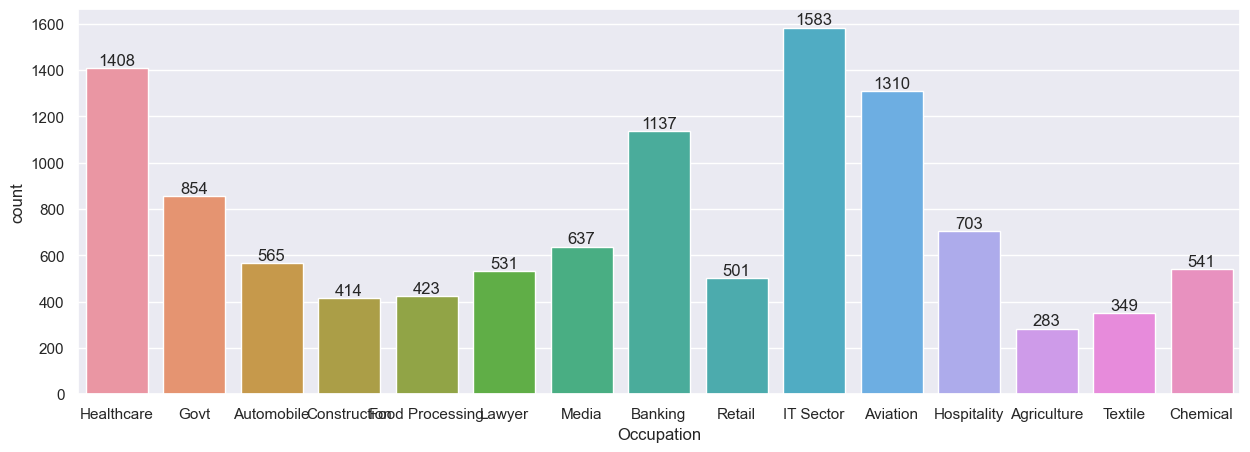

In [78]:
sns.set(rc={'figure.figsize':(15,5)})
ps=sns.countplot(data=df,x='Occupation')
for bars in ps.containers:
    ps.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

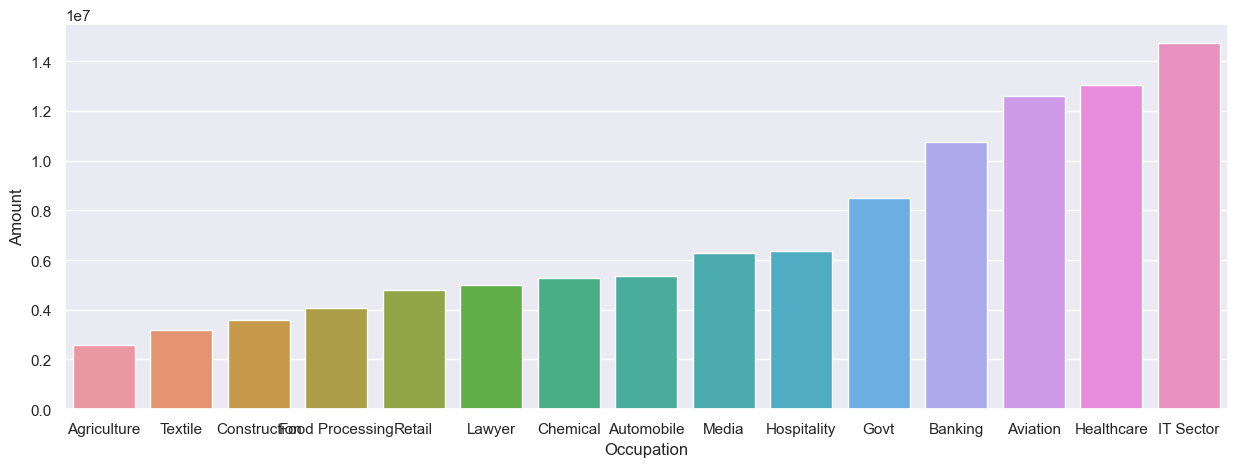

In [80]:
sale_state=df.groupby(['Occupation'],as_index=False)["Amount"].sum().sort_values('Amount',ascending=True)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sale_state,x="Occupation",y="Amount")


It Sector workking people are shop most

<Axes: xlabel='Product_Category', ylabel='Amount'>

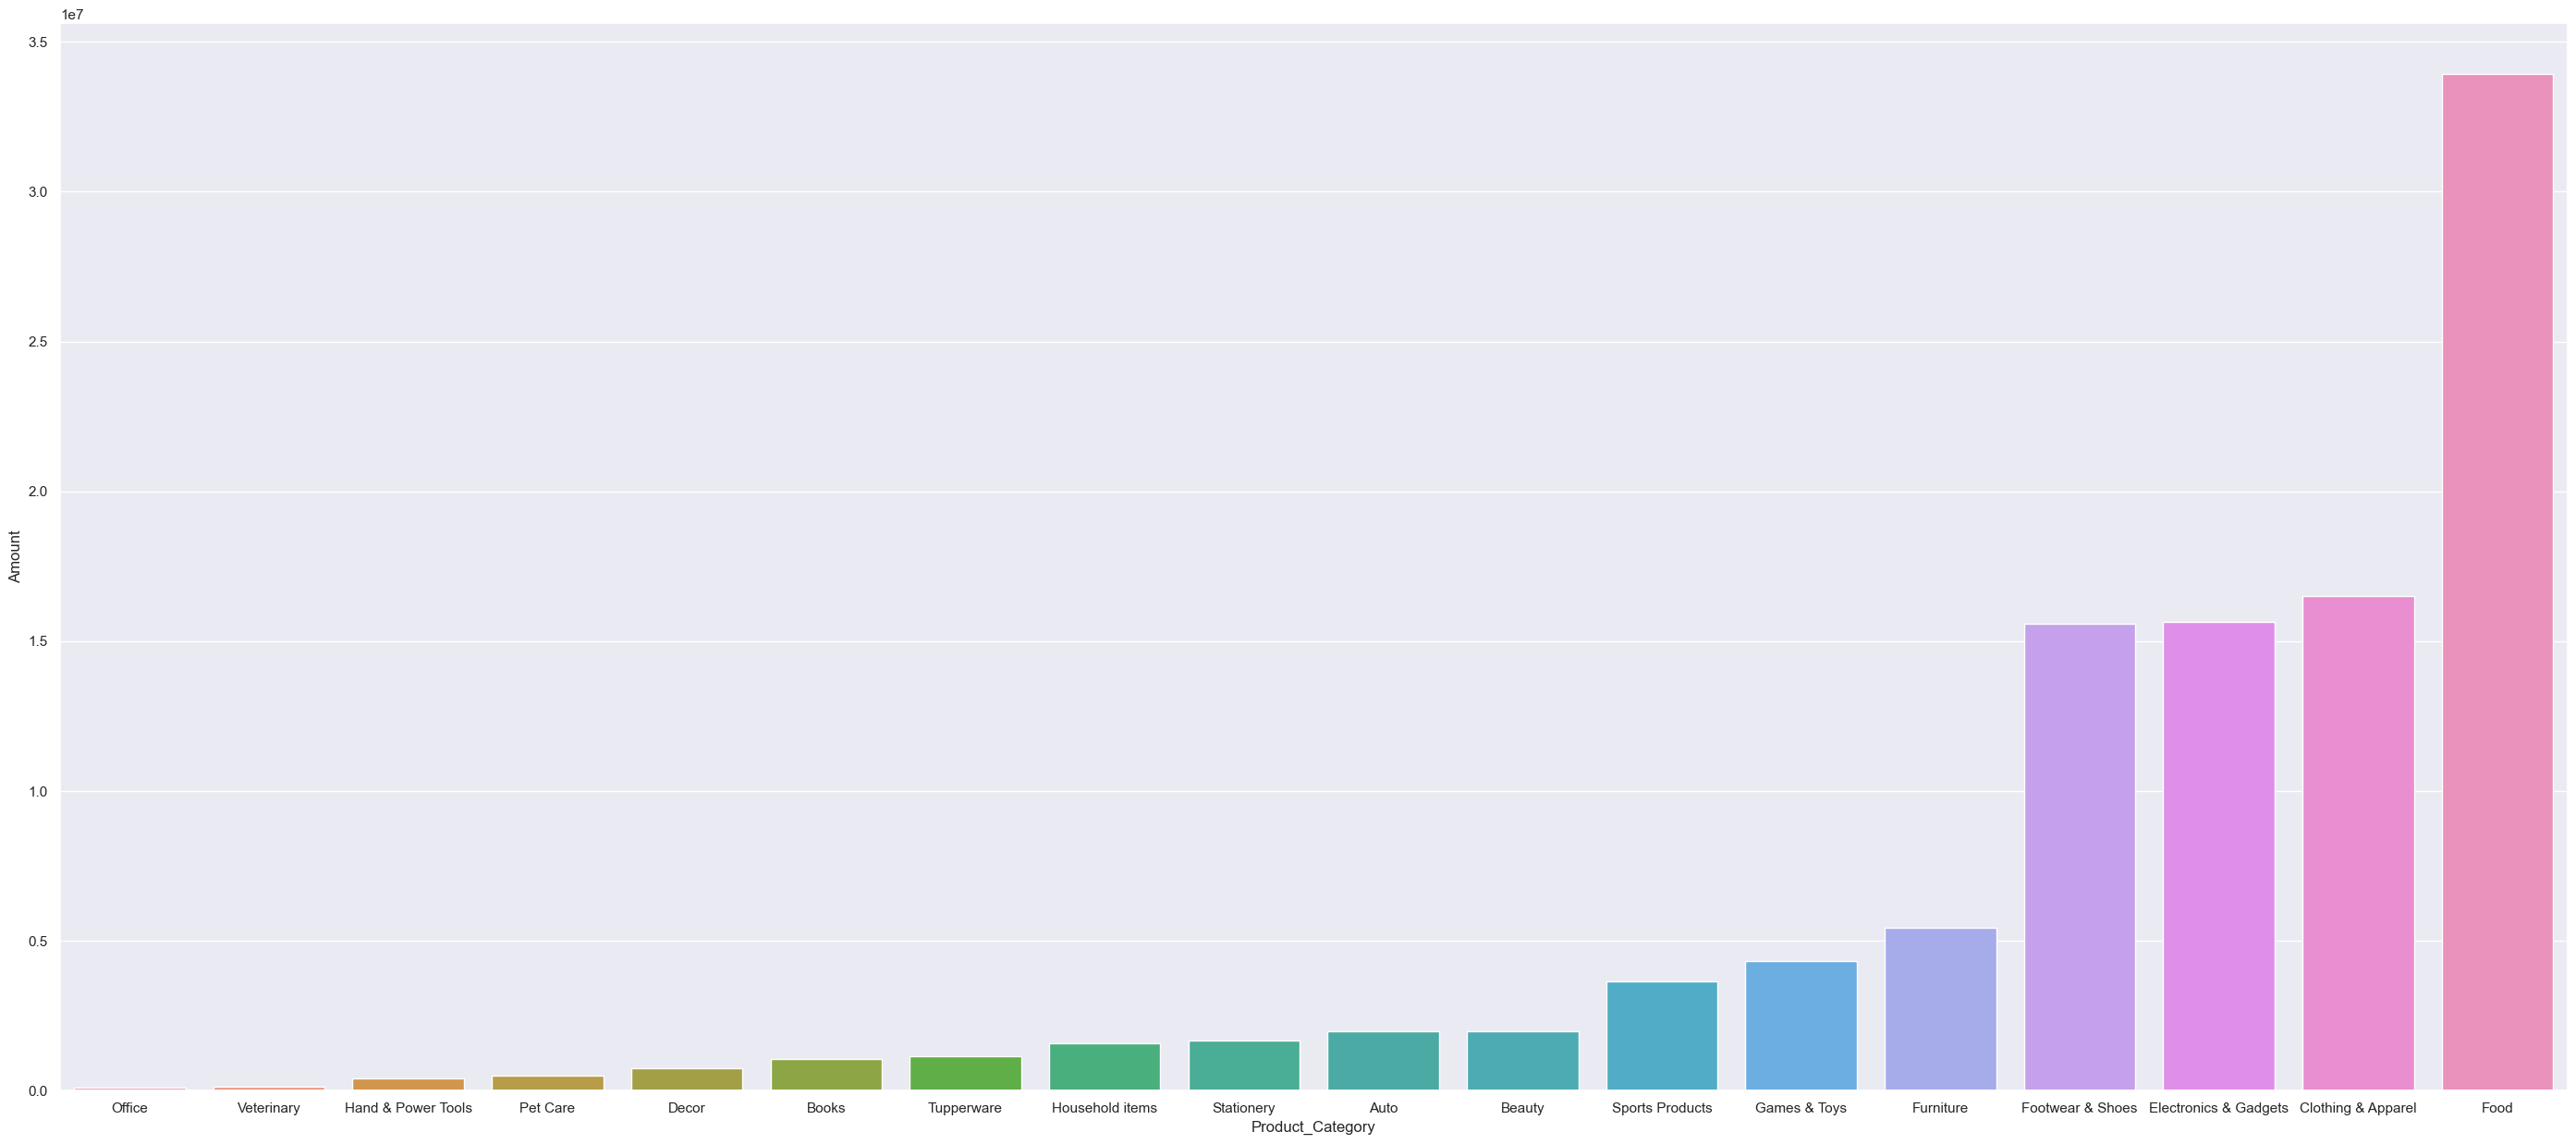

In [96]:
sale_product=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=True)
sns.set(rc={'figure.figsize':(35,15)})
sns.barplot(data=sale_product,x="Product_Category",y="Amount")

most of the people buy food 